In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# First step will be to import the feature data and the labels
data_path = "C:/Users/biapt/Documents/full_wei_data.csv";
data = pd.read_csv(data_path)
# here what everything means:
'''
frequencies = {"alpha","beta","delta","theta","gamma"};
epochs = {'ec1','emf5','ec1','if5','emf5','eml5','ec3','ec8'};
graph = {"aec","pli"}
The ids we see are mapping to these
'''
data

,p_id,frequency,epoch,graph,window,mean_1,mean_2,mean_3,mean_4,mean_5,...,clust_coeff_ 77,clust_coeff_ 78,clust_coeff_ 79,clust_coeff_ 80,clust_coeff_ 81,clust_coeff_ 82,norm_avg_clust_coeff,norm_g_eff,community,small_worldness
0,1,1,1,0,1,0.214410,0.206480,0.186960,0.095920,0.185300,...,0.111200,0.127020,0.102430,0.137680,0.151390,0.101670,0.99897,0.97336,0.147250,0.95888
1,1,1,1,1,1,0.135180,0.133150,0.066425,0.142670,0.187410,...,0.106720,0.128150,0.104750,0.105940,0.094395,0.109470,0.99442,0.97609,0.117070,0.95943
2,1,1,1,0,2,0.173520,0.176050,0.207510,0.196660,0.100010,...,0.193260,0.181300,0.098848,0.171360,0.131640,0.119280,0.99763,0.98745,0.083997,0.97921
3,1,1,1,1,2,0.135480,0.110920,0.099013,0.136760,0.166900,...,0.091389,0.103490,0.113290,0.102150,0.087017,0.120590,0.99338,0.98542,0.119380,0.96962
4,1,1,1,0,3,0.090807,0.194400,0.160160,0.122470,0.049862,...,0.115170,0.109680,0.092119,0.157790,0.145170,0.150840,0.99841,0.98561,0.147540,0.97606
5,1,1,1,1,3,0.089552,0.056574,0.085036,0.109230,0.130940,...,0.101490,0.087030,0.086551,0.071742,0.069271,0.094503,0.99216,0.98582,0.110580,0.96761
6,1,1,1,0,4,0.092985,0.167780,0.171060,0.174230,0.075009,...,0.132310,0.112610,0.099264,0.141140,0.116810,0.122770,0.99815,0.98590,0.142180,0.97396
7,1,1,1,1,4,0.056143,0.058897,0.039806,0.064573,0.101440,...,0.108020,0.113390,0.078162,0.068628,0.074071,0.096014,0.99498,0.98338,0.121510,0.97278
8,1,1,1,0,5,0.085757,0.135000,0.094392,0.174200,0.048321,...,0.097576,0.108650,0.116480,0.127690,0.107610,0.087126,0.99925,0.99085,0.142330,0.98124
9,1,1,1,1,5,0.104530,0.089392,0.081475,0.106140,0.129180,...,0.085813,0.122850,0.074097,0.087794,0.088316,0.095469,0.99460,0.98725,0.119500,0.97627


In [4]:
# We will keep the same structure than we did in the AEC vs wPLI project for the machine learning

# Machine Learning 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
# Sklearn utils
from sklearn.base import clone
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# aec = 0 pli = 1
analysis_type = 1
epochs_to_keep = [1,4]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]

clfs = [LinearDiscriminantAnalysis(solver='svd'), SVC(kernel='linear', C=0.1),SVC(kernel='linear', C=0.5), SVC(kernel='linear', C=1.0), SVC(kernel='rbf', C=0.1), SVC(kernel='rbf',C=1.0),RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)]
selected_clf = clfs[2]

def classify(dataset, original_clf):
    clf = clone(original_clf)
    # Initialize the Result data structures
    cms = []
    accuracies = []
    reports = []
    for test_id in range(1,10):
        #print("Participant: " + str(test_id) + " in hold-out set:")
        
        # Split the data in a leave one subject out manner
        
        # Get the training and test dataset
        training_dataset = dataset[dataset['p_id'] != test_id]
        test_dataset = dataset[dataset['p_id'] == test_id]
        
        # Get the X and Y 
        X_train = training_dataset.iloc[:,5:]
        y_train = training_dataset['epoch']
        
        # Training the min max normalizer
        min_max_scaler = MinMaxScaler()
        min_max_scaler.fit(X_train)
        X_train = min_max_scaler.transform(X_train)
        
        X_test = test_dataset.iloc[:,5:]
        y_test = test_dataset['epoch']
        
        # Normalize the test set using a training scaler
        X_test = min_max_scaler.transform(X_test)
        
        # Fitting our model
        clf.fit(X_train, y_train)

        # predicting
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        print("Generalization accuracy: " + str(accuracy))
        #print(cm)
        #print(report)
        
        # Saving the results
        cms.append(cm)
        accuracies.append(accuracy)
        reports.append(report)
        
    return (cms,accuracies,reports)

(cms, accuracies, report) = classify(subset_data, selected_clf)
print("Mean accuracy is: " + str(np.mean(accuracies)))

Generalization accuracy: 0.7391304347826086
Generalization accuracy: 0.9565217391304348
Generalization accuracy: 0.6260869565217392
Generalization accuracy: 0.9557522123893806
Generalization accuracy: 0.6896551724137931
Generalization accuracy: 0.9900990099009901
Generalization accuracy: 0.9310344827586207
Generalization accuracy: 0.6448598130841121
Generalization accuracy: 0.9568965517241379
Mean accuracy is: 0.8322262636339797


In [5]:
# Iterating through all the epoch and aggregating all the averages
selected_clf = clfs[2] # goes from 0 to 7
total = 0
for a_i in range(0,2):
    for e_i in range(2,6):
        analysis_type = a_i # 0 = aec, 1 = wPLI
        epochs_to_keep = [1,e_i]
        analysis = data['graph'] == analysis_type
        baseline = data['epoch'] == epochs_to_keep[0]
        other = data['epoch'] == epochs_to_keep[1]
        subset_data = data[analysis & (baseline | other)]
        (cms, accuracies, report) = classify(subset_data, selected_clf)
        total = total + np.mean(accuracies)
print("Average performance for classifier = " + str(total/8))

Generalization accuracy: 0.5714285714285714
Generalization accuracy: 0.6347826086956522
Generalization accuracy: 0.5478260869565217
Generalization accuracy: 0.3805309734513274
Generalization accuracy: 0.4827586206896552
Generalization accuracy: 0.6435643564356436
Generalization accuracy: 0.6724137931034483
Generalization accuracy: 0.4727272727272727
Generalization accuracy: 0.5862068965517241
Generalization accuracy: 0.9304347826086956
Generalization accuracy: 0.9130434782608695
Generalization accuracy: 0.9130434782608695
Generalization accuracy: 0.911504424778761
Generalization accuracy: 0.7672413793103449
Generalization accuracy: 0.8712871287128713
Generalization accuracy: 0.9310344827586207
Generalization accuracy: 0.8181818181818182
Generalization accuracy: 0.9741379310344828
Generalization accuracy: 0.591304347826087
Generalization accuracy: 0.8260869565217391
Generalization accuracy: 0.3652173913043478
Generalization accuracy: 0.7876106194690266
Generalization accuracy: 0.6810344

## Average Classification Result
- LDA : 0.6650799789491493
- Linear SVM C=0.1 : 0.6850622618599771
- Linear SVM C=0.5 : 0.6852205308138111
- Linear SVM C=1.0 : 0.6842265725506583
- RBF SVM C=0.1 : 0.5581517916164056
- RBF SVM C=1.0 : 0.6448795803208284
- RF n=100, max=2 : 0.6528903224361835

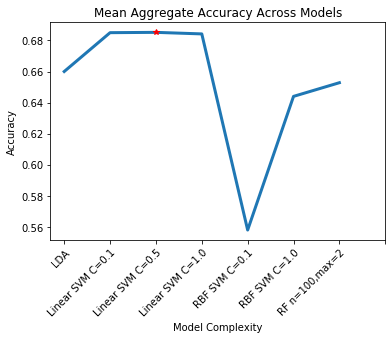

In [6]:
# Generating the figure 
# Visualization
import matplotlib.pyplot as plt
#Helper function
def make_plot(data,title):
    #static data
    models = ["LDA","Linear SVM C=0.1", "Linear SVM C=0.5", "Linear SVM C=1.0", "RBF SVM C=0.1", "RBF SVM C=1.0", "RF n=100,max=2"]
    x = [0,1,2,3,4,5,6]

    # Figure 
    fig = plt.figure()
    ax = plt.axes()

    ax.plot(x, data, linewidth=3)
    ax.plot(2,data[2],'r*')

    ax.set(xticks=np.arange(len(data) + 1),
        # ... and label them with the respective list entries
        xticklabels=models,
        title=title,
        ylabel='Accuracy',
        xlabel='Model Complexity')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

    plt.show()
    
aggregate = [0.66, 0.6850, 0.6852, 0.6842, 0.558, 0.644 ,0.6528]
make_plot(aggregate, "Mean Aggregate Accuracy Across Models")

In [8]:
from math import floor
import pickle
import copy
from sklearn.utils import resample

# Now we need to add in the bootstrap confidence interval and the permutation testing
# Iterate num_bootstrap times and create a classifier with the resampled data
# Then create confidence interval for the and the accuracy, f_1 score
# The p value used here is 0.05
# This means that the lower bound = math.floor((num_bootstrap/100)*2.5)
#                     upper bound = math.floor((num_bootstrap/100)*97.5)
def generate_confidence_interval(original_dataset, clf, num_bootstrap):
    lb_index = floor((num_bootstrap/100)*(2.5))
    ub_index = floor((num_bootstrap/100)*(97.5))

    accuracies = []

    conf_interval_accuracy = (-1,-1)

    # Here we overwrite the dataset X, y and I and run the classify function
    # for each bootstrap samples
    for b_id in range(num_bootstrap):
        print("Bootstrap sample #" + str(b_id))
        # Copy the original dataset before manipulating it
        dataset = copy.deepcopy(original_dataset)

        # Get the sampled with replacement dataset
        resampled_data = resample(dataset)

        # Classify and get the results
        (cms, acc, report) = classify(resampled_data, clf)

        accuracies.append(np.mean(acc))
                          
    # Sort the results
    accuracies.sort()

    # Set the confidence interval at the right index
    conf_interval_accuracy = (accuracies[lb_index],accuracies[ub_index])

    return (accuracies,conf_interval_accuracy)

# Bootstrap experiment setup
filename = "wpli_pre_roc"
selected_clf = clfs[2] # 2 was the best
analysis_type = 1 # 0 = aec, 1 = wPLI
epochs_to_keep = [1,4]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]
                          
# Generate confidence interval for the classifier
num_bootstrap = 5000
(accuracies,conf_interval_accuracy) = generate_confidence_interval(subset_data, selected_clf, num_bootstrap)
print("Confidence interval for Accuracy: " + str(conf_interval_accuracy))
pickle_out = open(filename,"wb")
pickle.dump(accuracies, pickle_out)
pickle_out.close()

Bootstrap sample #0
Bootstrap sample #1
Bootstrap sample #2
Bootstrap sample #3
Bootstrap sample #4
Bootstrap sample #5
Bootstrap sample #6
Bootstrap sample #7
Bootstrap sample #8
Bootstrap sample #9
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Confidence interval for Accuracy: (0.8537791111162774, 0.9098140292732381)
Bootstrap sample #378
Bootstrap sample #379
Bootstrap sample #380
Bootstrap sample #381
Bootstrap sample #382
Bootstrap sample #383
Bootstrap sample #384
Bootstrap sample #385
Bootstrap sample #386
Bootstrap sample #387
Bootstrap sample #388
Bootstrap sample #389
Bootstrap sample #390
Bootstrap sample #391
Bootstrap sample #392
Bootstrap sample #393
Bootstrap sample #394
Bootstrap sample #395
Bootstrap sample #396
Bootstrap sample #3

Bootstrap sample #751
Bootstrap sample #752
Bootstrap sample #753
Bootstrap sample #754
Bootstrap sample #755
Bootstrap sample #756
Bootstrap sample #757
Bootstrap sample #758
Bootstrap sample #759
Bootstrap sample #760
Bootstrap sample #761
Bootstrap sample #762
Bootstrap sample #763
Bootstrap sample #764
Bootstrap sample #765
Bootstrap sample #766
Bootstrap sample #767
Bootstrap sample #768
Bootstrap sample #769
Bootstrap sample #770
Bootstrap sample #771
Bootstrap sample #772
Bootstrap sample #773
Bootstrap sample #774
Bootstrap sample #775
Bootstrap sample #776
Bootstrap sample #777
Bootstrap sample #778
Bootstrap sample #779
Bootstrap sample #780
Bootstrap sample #781
Bootstrap sample #782
Bootstrap sample #783
Bootstrap sample #784
Bootstrap sample #785
Bootstrap sample #786
Bootstrap sample #787
Bootstrap sample #788
Bootstrap sample #789
Bootstrap sample #790
Bootstrap sample #791
Bootstrap sample #792
Bootstrap sample #793
Bootstrap sample #794
Bootstrap sample #795
Bootstrap 

Bootstrap sample #1119
Bootstrap sample #1120
Bootstrap sample #1121
Bootstrap sample #1122
Bootstrap sample #1123
Bootstrap sample #1124
Bootstrap sample #1125
Bootstrap sample #1126
Bootstrap sample #1127
Bootstrap sample #1128
Bootstrap sample #1129
Bootstrap sample #1130
Bootstrap sample #1131
Bootstrap sample #1132
Bootstrap sample #1133
Bootstrap sample #1134
Bootstrap sample #1135
Bootstrap sample #1136
Bootstrap sample #1137
Bootstrap sample #1138
Bootstrap sample #1139
Bootstrap sample #1140
Bootstrap sample #1141
Bootstrap sample #1142
Bootstrap sample #1143
Bootstrap sample #1144
Bootstrap sample #1145
Bootstrap sample #1146
Bootstrap sample #1147
Bootstrap sample #1148
Bootstrap sample #1149
Bootstrap sample #1150
Bootstrap sample #1151
Bootstrap sample #1152
Bootstrap sample #1153
Bootstrap sample #1154
Bootstrap sample #1155
Bootstrap sample #1156
Bootstrap sample #1157
Bootstrap sample #1158
Bootstrap sample #1159
Bootstrap sample #1160
Bootstrap sample #1161
Bootstrap s

Bootstrap sample #1476
Bootstrap sample #1477
Bootstrap sample #1478
Bootstrap sample #1479
Bootstrap sample #1480
Bootstrap sample #1481
Bootstrap sample #1482
Bootstrap sample #1483
Bootstrap sample #1484
Bootstrap sample #1485
Bootstrap sample #1486
Bootstrap sample #1487
Bootstrap sample #1488
Bootstrap sample #1489
Bootstrap sample #1490
Bootstrap sample #1491
Bootstrap sample #1492
Bootstrap sample #1493
Bootstrap sample #1494
Bootstrap sample #1495
Bootstrap sample #1496
Bootstrap sample #1497
Bootstrap sample #1498
Bootstrap sample #1499
Bootstrap sample #1500
Bootstrap sample #1501
Bootstrap sample #1502
Bootstrap sample #1503
Bootstrap sample #1504
Bootstrap sample #1505
Bootstrap sample #1506
Bootstrap sample #1507
Bootstrap sample #1508
Bootstrap sample #1509
Bootstrap sample #1510
Bootstrap sample #1511
Bootstrap sample #1512
Bootstrap sample #1513
Bootstrap sample #1514
Bootstrap sample #1515
Bootstrap sample #1516
Bootstrap sample #1517
Bootstrap sample #1518
Bootstrap s

Bootstrap sample #1833
Bootstrap sample #1834
Bootstrap sample #1835
Bootstrap sample #1836
Bootstrap sample #1837
Bootstrap sample #1838
Bootstrap sample #1839
Bootstrap sample #1840
Bootstrap sample #1841
Bootstrap sample #1842
Bootstrap sample #1843
Bootstrap sample #1844
Bootstrap sample #1845
Bootstrap sample #1846
Bootstrap sample #1847
Bootstrap sample #1848
Bootstrap sample #1849
Bootstrap sample #1850
Bootstrap sample #1851
Bootstrap sample #1852
Bootstrap sample #1853
Bootstrap sample #1854
Bootstrap sample #1855
Bootstrap sample #1856
Bootstrap sample #1857
Bootstrap sample #1858
Bootstrap sample #1859
Bootstrap sample #1860
Bootstrap sample #1861
Bootstrap sample #1862
Bootstrap sample #1863
Bootstrap sample #1864
Bootstrap sample #1865
Bootstrap sample #1866
Bootstrap sample #1867
Bootstrap sample #1868
Bootstrap sample #1869
Bootstrap sample #1870
Bootstrap sample #1871
Bootstrap sample #1872
Bootstrap sample #1873
Bootstrap sample #1874
Bootstrap sample #1875
Bootstrap s

Bootstrap sample #2190
Bootstrap sample #2191
Bootstrap sample #2192
Bootstrap sample #2193
Bootstrap sample #2194
Bootstrap sample #2195
Bootstrap sample #2196
Bootstrap sample #2197
Bootstrap sample #2198
Bootstrap sample #2199
Bootstrap sample #2200
Bootstrap sample #2201
Bootstrap sample #2202
Bootstrap sample #2203
Bootstrap sample #2204
Bootstrap sample #2205
Bootstrap sample #2206
Bootstrap sample #2207
Bootstrap sample #2208
Bootstrap sample #2209
Bootstrap sample #2210
Bootstrap sample #2211
Bootstrap sample #2212
Bootstrap sample #2213
Bootstrap sample #2214
Bootstrap sample #2215
Bootstrap sample #2216
Bootstrap sample #2217
Bootstrap sample #2218
Bootstrap sample #2219
Bootstrap sample #2220
Bootstrap sample #2221
Bootstrap sample #2222
Bootstrap sample #2223
Bootstrap sample #2224
Bootstrap sample #2225
Bootstrap sample #2226
Bootstrap sample #2227
Bootstrap sample #2228
Bootstrap sample #2229
Bootstrap sample #2230
Bootstrap sample #2231
Bootstrap sample #2232
Bootstrap s

Bootstrap sample #2547
Bootstrap sample #2548
Bootstrap sample #2549
Bootstrap sample #2550
Bootstrap sample #2551
Bootstrap sample #2552
Bootstrap sample #2553
Bootstrap sample #2554
Bootstrap sample #2555
Bootstrap sample #2556
Bootstrap sample #2557
Bootstrap sample #2558
Bootstrap sample #2559
Bootstrap sample #2560
Bootstrap sample #2561
Bootstrap sample #2562
Bootstrap sample #2563
Bootstrap sample #2564
Bootstrap sample #2565
Bootstrap sample #2566
Bootstrap sample #2567
Bootstrap sample #2568
Bootstrap sample #2569
Bootstrap sample #2570
Bootstrap sample #2571
Bootstrap sample #2572
Bootstrap sample #2573
Bootstrap sample #2574
Bootstrap sample #2575
Bootstrap sample #2576
Bootstrap sample #2577
Bootstrap sample #2578
Bootstrap sample #2579
Bootstrap sample #2580
Bootstrap sample #2581
Bootstrap sample #2582
Bootstrap sample #2583
Bootstrap sample #2584
Bootstrap sample #2585
Bootstrap sample #2586
Bootstrap sample #2587
Bootstrap sample #2588
Bootstrap sample #2589
Bootstrap s

Bootstrap sample #2904
Bootstrap sample #2905
Bootstrap sample #2906
Bootstrap sample #2907
Bootstrap sample #2908
Bootstrap sample #2909
Bootstrap sample #2910
Bootstrap sample #2911
Bootstrap sample #2912
Bootstrap sample #2913
Bootstrap sample #2914
Bootstrap sample #2915
Bootstrap sample #2916
Bootstrap sample #2917
Bootstrap sample #2918
Bootstrap sample #2919
Bootstrap sample #2920
Bootstrap sample #2921
Bootstrap sample #2922
Bootstrap sample #2923
Bootstrap sample #2924
Bootstrap sample #2925
Bootstrap sample #2926
Bootstrap sample #2927
Bootstrap sample #2928
Bootstrap sample #2929
Bootstrap sample #2930
Bootstrap sample #2931
Bootstrap sample #2932
Bootstrap sample #2933
Bootstrap sample #2934
Bootstrap sample #2935
Bootstrap sample #2936
Bootstrap sample #2937
Bootstrap sample #2938
Bootstrap sample #2939
Bootstrap sample #2940
Bootstrap sample #2941
Bootstrap sample #2942
Bootstrap sample #2943
Bootstrap sample #2944
Bootstrap sample #2945
Bootstrap sample #2946
Bootstrap s

Bootstrap sample #3261
Bootstrap sample #3262
Bootstrap sample #3263
Bootstrap sample #3264
Bootstrap sample #3265
Bootstrap sample #3266
Bootstrap sample #3267
Bootstrap sample #3268
Bootstrap sample #3269
Bootstrap sample #3270
Bootstrap sample #3271
Bootstrap sample #3272
Bootstrap sample #3273
Bootstrap sample #3274
Bootstrap sample #3275
Bootstrap sample #3276
Bootstrap sample #3277
Bootstrap sample #3278
Bootstrap sample #3279
Bootstrap sample #3280
Bootstrap sample #3281
Bootstrap sample #3282
Bootstrap sample #3283
Bootstrap sample #3284
Bootstrap sample #3285
Bootstrap sample #3286
Bootstrap sample #3287
Bootstrap sample #3288
Bootstrap sample #3289
Bootstrap sample #3290
Bootstrap sample #3291
Bootstrap sample #3292
Bootstrap sample #3293
Bootstrap sample #3294
Bootstrap sample #3295
Bootstrap sample #3296
Bootstrap sample #3297
Bootstrap sample #3298
Bootstrap sample #3299
Bootstrap sample #3300
Bootstrap sample #3301
Bootstrap sample #3302
Bootstrap sample #3303
Bootstrap s

Bootstrap sample #3618
Bootstrap sample #3619
Bootstrap sample #3620
Bootstrap sample #3621
Bootstrap sample #3622
Bootstrap sample #3623
Bootstrap sample #3624
Bootstrap sample #3625
Bootstrap sample #3626
Bootstrap sample #3627
Bootstrap sample #3628
Bootstrap sample #3629
Bootstrap sample #3630
Bootstrap sample #3631
Bootstrap sample #3632
Bootstrap sample #3633
Bootstrap sample #3634
Bootstrap sample #3635
Bootstrap sample #3636
Bootstrap sample #3637
Bootstrap sample #3638
Bootstrap sample #3639
Bootstrap sample #3640
Bootstrap sample #3641
Bootstrap sample #3642
Bootstrap sample #3643
Bootstrap sample #3644
Bootstrap sample #3645
Bootstrap sample #3646
Bootstrap sample #3647
Bootstrap sample #3648
Bootstrap sample #3649
Bootstrap sample #3650
Bootstrap sample #3651
Bootstrap sample #3652
Bootstrap sample #3653
Bootstrap sample #3654
Bootstrap sample #3655
Bootstrap sample #3656
Bootstrap sample #3657
Bootstrap sample #3658
Bootstrap sample #3659
Bootstrap sample #3660
Bootstrap s

Bootstrap sample #3975
Bootstrap sample #3976
Bootstrap sample #3977
Bootstrap sample #3978
Bootstrap sample #3979
Bootstrap sample #3980
Bootstrap sample #3981
Bootstrap sample #3982
Bootstrap sample #3983
Bootstrap sample #3984
Bootstrap sample #3985
Bootstrap sample #3986
Bootstrap sample #3987
Bootstrap sample #3988
Bootstrap sample #3989
Bootstrap sample #3990
Bootstrap sample #3991
Bootstrap sample #3992
Bootstrap sample #3993
Bootstrap sample #3994
Bootstrap sample #3995
Bootstrap sample #3996
Bootstrap sample #3997
Bootstrap sample #3998
Bootstrap sample #3999
Bootstrap sample #4000
Bootstrap sample #4001
Bootstrap sample #4002
Bootstrap sample #4003
Bootstrap sample #4004
Bootstrap sample #4005
Bootstrap sample #4006
Bootstrap sample #4007
Bootstrap sample #4008
Bootstrap sample #4009
Bootstrap sample #4010
Bootstrap sample #4011
Bootstrap sample #4012
Bootstrap sample #4013
Bootstrap sample #4014
Bootstrap sample #4015
Bootstrap sample #4016
Bootstrap sample #4017
Bootstrap s

Bootstrap sample #4332
Bootstrap sample #4333
Bootstrap sample #4334
Bootstrap sample #4335
Bootstrap sample #4336
Bootstrap sample #4337
Bootstrap sample #4338
Bootstrap sample #4339
Bootstrap sample #4340
Bootstrap sample #4341
Bootstrap sample #4342
Bootstrap sample #4343
Bootstrap sample #4344
Bootstrap sample #4345
Bootstrap sample #4346
Bootstrap sample #4347
Bootstrap sample #4348
Bootstrap sample #4349
Bootstrap sample #4350
Bootstrap sample #4351
Bootstrap sample #4352
Bootstrap sample #4353
Bootstrap sample #4354
Bootstrap sample #4355
Bootstrap sample #4356
Bootstrap sample #4357
Bootstrap sample #4358
Bootstrap sample #4359
Bootstrap sample #4360
Bootstrap sample #4361
Bootstrap sample #4362
Bootstrap sample #4363
Bootstrap sample #4364
Bootstrap sample #4365
Bootstrap sample #4366
Bootstrap sample #4367
Bootstrap sample #4368
Bootstrap sample #4369
Bootstrap sample #4370
Bootstrap sample #4371
Bootstrap sample #4372
Bootstrap sample #4373
Bootstrap sample #4374
Bootstrap s

Bootstrap sample #4689
Bootstrap sample #4690
Bootstrap sample #4691
Bootstrap sample #4692
Bootstrap sample #4693
Bootstrap sample #4694
Bootstrap sample #4695
Bootstrap sample #4696
Bootstrap sample #4697
Bootstrap sample #4698
Bootstrap sample #4699
Bootstrap sample #4700
Bootstrap sample #4701
Bootstrap sample #4702
Bootstrap sample #4703
Bootstrap sample #4704
Bootstrap sample #4705
Bootstrap sample #4706
Bootstrap sample #4707
Bootstrap sample #4708
Bootstrap sample #4709
Bootstrap sample #4710
Bootstrap sample #4711
Bootstrap sample #4712
Bootstrap sample #4713
Bootstrap sample #4714
Bootstrap sample #4715
Bootstrap sample #4716
Bootstrap sample #4717
Bootstrap sample #4718
Bootstrap sample #4719
Bootstrap sample #4720
Bootstrap sample #4721
Bootstrap sample #4722
Bootstrap sample #4723
Bootstrap sample #4724
Bootstrap sample #4725
Bootstrap sample #4726
Bootstrap sample #4727
Bootstrap sample #4728
Bootstrap sample #4729
Bootstrap sample #4730
Bootstrap sample #4731
Bootstrap s

In [102]:
# Getting the weights for the classification (the last one are important not the first one)
# Fucntion to get the weights out of the SVM
def get_weight(dataset, original_clf):
    clf = clone(original_clf)
    # Fitting our model
    X_train = dataset.iloc[:,5:]
    y_train = dataset['epoch']

    # Normalize the test set using a training scaler
    # Training the min max normalizer
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train = min_max_scaler.transform(X_train)
    X_train = min_max_scaler.transform(X_train)

    # Fitting our model
    clf.fit(X_train, y_train)

    # get weights
    weights = clf.coef_
    weights = np.abs(weights[0]) # Take the absolute values of the coefficients

    
    #norm_avg_clust_coeff 	norm_g_eff 	community 	small_worldness
    weights_mean = weights[0:82]
    weights_std = weights[82:164]
    weights_clust = weights[164:246]
    weight_avg_clust = weights[246]
    weight_g_eff = weights[247]
    weight_community = weights[248]
    weight_sm = weights[249]
    

    return weights_mean,weights_std,weights_clust,weight_avg_clust,weight_g_eff,weight_community,weight_sm

def find_rank_weight(target, weights):
    i = 0
    for weight in weights:
        if(target <= weight):
            return (i-1)/len(weights)
        i = i + 1
    return i/len(weights)
        
# Get the weights of the linear svm with c=0.5
selected_clf = clfs[2] # 2 was the best
analysis_type = 0 # 0 = aec, 1 = wPLI
epochs_to_keep = [1,3]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]
weights_mean,weights_std,weights_clust,weight_avg_clust,weight_g_eff,weight_community,weight_sm = get_weight(subset_data, selected_clf)


# Try to find the relative importance of the graph feature in importance (%)
all_features = np.concatenate((weights_mean,weights_std),axis=0)
all_features = np.concatenate((all_features,weights_clust),axis=0)
np.append(all_features, [weight_avg_clust])
np.append(all_features, [weight_g_eff])
np.append(all_features, [weight_community])
np.append(all_features, [weight_sm])
all_features.sort()


# sum weights clust coeff
all_rank = 0
for i in range(0,len(weights_clust)):
    all_rank = all_rank + find_rank_weight(weights_clust[i], all_features)
all_rank = all_rank/len(weights_clust)
print("All cluster coefficient: " + str(all_rank))

# weight_avg_clust
rank_avg_clust = find_rank_weight(weight_avg_clust, all_features)
print("Avg Cluster Coefficient: " + str(rank_avg_single_clust))

# weight_g_eff
rank_g_eff = find_rank_weight(weight_g_eff, all_features)
print("Global Efficiency: " + str(rank_g_eff))

# weight_community
rank_community = find_rank_weight(weight_community, all_features)
print("Community: " + str(rank_community))

# weight_sm
rank_sm = find_rank_weight(weight_sm, all_features)
print("Smallworldness: " + str(rank_sm))

# All graph usefulness
usefulness = (rank_avg_clust + rank_g_eff + rank_community + rank_sm)/4
print("Graph usefulness: " + str(usefulness))

IndexError: index 246 is out of bounds for axis 0 with size 86

## Feature weights are hard to understand when not visualizing them
- I don't have time for this now, it would have been nice to have an already made functionality in python to put color on a brain (TODO)
- Will look at the stability of the classification with the graph (per participants)
    
    

In [138]:
# functional connectivity
fct_pli_unc = np.array([0.84,0.89,0.70,0.95,0.66,0.59,0.92,0.54,0.93])
fct_aec_unc = np.array([0.91,0.87,0.87,0.87,0.75,0.80,0.93,0.80,0.93])

fct_pli_prc = np.array([0.70,0.93,0.6,0.90,0.65,0.98,0.90,0.65,0.91])
fct_aec_prc = np.array([0.63,0.80,0.40,0.74,0.64,0.92,0.87,0.74,0.76])

# Graph Theory
gp_pli_unc = np.array([0.83,0.87,0.72,0.91,0.67,0.63,0.93,0.57,0.94])
gp_aec_unc = np.array([0.93,0.91,0.91,0.911,0.76,0.87,0.93,0.81,0.97])

gp_pli_prc = np.array([0.73,0.95,0.62,0.95,0.68,0.99,0.93,0.64,0.95])
gp_aec_prc = np.array([0.59,0.82,0.36,0.78,0.68,0.91,0.90,0.72,0.75])

# Check Mean and std
print("PLI Unconscious")
print("FC:" + str(np.mean(fct_pli_unc)) + str(np.std(fct_pli_unc)))
print("GP:" + str(np.mean(gp_pli_unc)) + str(np.std(gp_pli_unc)))
print("PLI pre-ROC")
print("FC:" + str(np.mean(fct_pli_prc)) + str(np.std(fct_pli_prc)))
print("GP:" + str(np.mean(gp_pli_prc)) + str(np.std(gp_pli_prc)))

print("AEC Unconscious")
print("FC:" + str(np.mean(fct_aec_unc)) + str(np.std(fct_aec_unc)))
print("GP:" + str(np.mean(gp_aec_unc)) + str(np.std(gp_aec_unc)))
print("AEC pre-ROC")
print("FC:" + str(np.mean(fct_aec_prc)) + str(np.std(fct_aec_prc)))
print("GP:" + str(np.mean(gp_aec_prc)) + str(np.std(gp_aec_prc)))

# Check Difference
diff_pli_unc = gp_pli_unc - fct_pli_unc
diff_pli_prc = gp_pli_prc - fct_pli_prc

diff_aec_unc = gp_aec_unc - fct_aec_unc
diff_aec_prc = gp_aec_prc - fct_aec_prc

print("PLI")
print(diff_pli_unc)
print(np.mean(diff_pli_unc))
print(diff_pli_prc)
print(np.mean(diff_pli_prc))
print("AEC")
print(diff_aec_unc)
print(np.mean(diff_aec_unc))
print(diff_aec_prc)
print(np.mean(diff_aec_prc))

PLI Unconscious
FC:0.77999999999999990.1495177432800387
GP:0.78555555555555560.13233888410785993
PLI pre-ROC
FC:0.80222222222222220.13998236220465443
GP:0.82666666666666670.1458309523615157
AEC Unconscious
FC:0.85888888888888890.059524867715461664
GP:0.88900000000000010.06194262578296862
AEC pre-ROC
FC:0.72222222222222220.1445896705837114
GP:0.72333333333333330.1602081978759722
PLI
[-0.01 -0.02  0.02 -0.04  0.01  0.04  0.01  0.03  0.01]
0.005555555555555548
[ 0.03  0.02  0.02  0.05  0.03  0.01  0.03 -0.01  0.04]
0.02444444444444443
AEC
[0.02  0.04  0.04  0.041 0.01  0.07  0.    0.01  0.04 ]
0.030111111111111113
[-0.04  0.02 -0.04  0.04  0.04 -0.01  0.03 -0.02 -0.01]
0.0011111111111110998


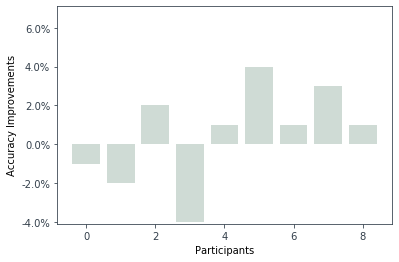

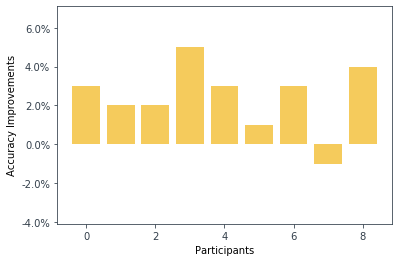

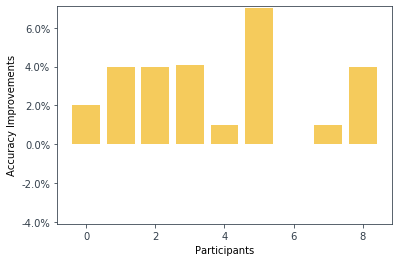

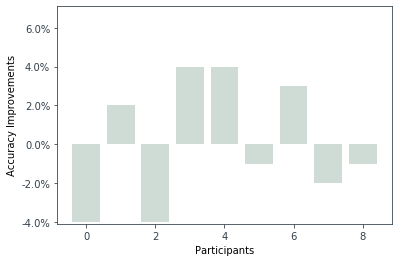

In [164]:
from matplotlib.ticker import FuncFormatter

# Make the plot (4 of them)
def percent(x, pos):
    'The two args are the value and tick position'
    return '%1.1f%s' % (x * 100,'%')


def barplot(data,minimum,maximum,color_t):
    x = np.arange(len(data))
    formatter = FuncFormatter(percent)
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel('Participants')
    ax.set_ylabel('Accuracy Improvements')
    ax.set_ylim((minimum, maximum))
    plt.bar(x, data,color=color_t)
    
    plt.show()
    
    
# Setting up the styling
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'


#diff_pli_unc
#diff_pli_prc

#diff_aec_unc
#diff_aec_prc
min_y = -0.041
max_y = 0.071
orange = (255/255,127/255,14/255,1.0)
blue = (31/255,119/255,180/255,1.0)
grey = (207/255, 219/255, 213/255, 1.0)
accent = (245/255, 203/255, 92/255, 1.0)
barplot(diff_pli_unc,min_y,max_y,grey)
barplot(diff_pli_prc,min_y,max_y,accent)
barplot(diff_aec_unc,min_y,max_y,accent)
barplot(diff_aec_prc,min_y,max_y,grey)

In [20]:
import pickle
# Redo the feature weights with mean and std only
# Getting the weights for the classification (the last one are important not the first one)
# Fucntion to get the weights out of the SVM
def get_mean_std_weight(dataset, original_clf):
    clf = clone(original_clf)
    # Fitting our model
    X_train = dataset.iloc[:,5:169]
    y_train = dataset['epoch']

    # Normalize the test set using a training scaler
    # Training the min max normalizer
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train = min_max_scaler.transform(X_train)
    X_train = min_max_scaler.transform(X_train)

    # Fitting our model
    clf.fit(X_train, y_train)

    # get weights
    weights = clf.coef_
    weights = np.abs(weights[0]) # Take the absolute values of the coefficients

    
    #norm_avg_clust_coeff 	norm_g_eff 	community 	small_worldness
    weights_mean = weights[0:82]
    weights_std = weights[82:164]

    return weights_mean,weights_std

# Get the weights of the linear svm with c=0.5
selected_clf = clfs[2] # 2 was the best
analysis_type = 1 # 0 = aec, 1 = wPLI
epochs_to_keep = [1,4] # 3 = unconscious and 4 = light unconscious
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]
weights_mean,weights_std = get_mean_std_weight(subset_data, selected_clf)


# Saving it for later use
filename = "wpli_pre_roc_weights.mat"
weights = [weights_mean,weights_std]

# Need to use this instead
import numpy, scipy.io
scipy.io.savemat(filename, mdict={'mean': weights_mean, 'std':weights_std})

array([3.10652911e-01, 3.31722251e-02, 3.98008239e-01, 1.17839402e-02,
       2.26328424e-01, 1.32747627e-01, 2.48137465e-01, 1.84238698e-01,
       8.71224659e-02, 3.57767828e-01, 2.75735726e-02, 1.70584368e-02,
       1.12164901e-01, 3.01957111e-01, 2.09368499e-01, 2.97995327e-01,
       1.77667851e-01, 1.48990754e-01, 4.33723459e-02, 2.74719335e-01,
       2.87265859e-01, 6.07872993e-03, 1.13922100e-01, 3.80422732e-04,
       1.84717778e-01, 1.05292057e-01, 2.70601889e-01, 5.04930738e-01,
       1.12941932e-01, 3.93741184e-01, 1.69168965e-01, 7.50065458e-04,
       1.38020917e-02, 3.06377780e-01, 1.88959640e-01, 2.20756218e-02,
       1.47606653e-01, 8.45814005e-02, 1.14540891e-01, 1.86618221e-01,
       3.83001551e-01, 1.63427981e-01, 2.80085077e-01, 9.72140254e-02,
       4.62488942e-01, 2.23420065e-01, 2.48333987e-01, 6.23908585e-02,
       1.34724667e-01, 8.25459124e-02, 6.20617341e-01, 6.62362732e-02,
       5.89069298e-02, 3.62750730e-01, 2.49368963e-01, 7.76407918e-02,
      